Kerrian LE CAILLEC - Thomas MIGLIASSO

## TP Question I

On travaille dans le cadre du modèle de Black & Scholes. Dans toutes ces questions, on
considère un call européen de maturité $T$ et de strike $K$. On pourra prendre comme valeurs de référence $S_0 = 100, K = 100, T = 1, r = 0.05, \sigma = 0.20$.


1. Pour différentes valeurs de $T$, tracer sur un même graphe en fonction de $S_0$ le prix du call
européen de maturité $T$ obtenu par la formule de Black & Scholes. Commenter. Même question pour le $\Delta$ et le $\Gamma$ du call.

In [2]:
# Useful imports
import numpy as np
from scipy.stats import norm, skew
import matplotlib.pyplot as plt

In [16]:
# Parameters for the simulations
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.2

Dans le cadre du modèle de Black & Scholes, le prix d'un call européen à l'instant $t=0$ est donné par la formule: 

$$
C = S_0 \mathcal{N}(d_1) - K e^{-rT} \mathcal{N}(d_2)
$$

avec

$$
d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}
$$ 

et
 
$$
d_2 = d_1 - \sigma \sqrt{T}
$$

Nous avons noté $\mathcal{N}$ la fonction de répartition de la loi normale centrée réduite. Le Delta et Gamma de l'option sont définis de la manière suivante en $t=0$, où C est le prix du call européen:

$$
\Delta = \frac{\partial C}{\partial S} = \mathcal{N}(d_1)
$$
et 
$$
\Gamma = \frac{\partial^2 C}{\partial S^2} = \frac{\mathcal{N}'(d_1)}{S_0\sigma\sqrt{T}}
$$

Nous implémentons les fonctions permettant leur calcul:

In [4]:
def call_price_black_scholes(K, T, S0, r, sigma):
    """
    Calculate the Black-Scholes price of a European call option.
    Parameters:
        K (float): Strike price of the option.
        T (float): Time to maturity (in years).
        S0 (float): Current price of the underlying asset.
        r (float): Risk-free interest rate.
        sigma (float): Volatility of the underlying asset.
    Returns:
        float: The Black-Scholes price of the European call option.
    """
    d1 = 1 / (sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + sigma**2 / 2) * T)
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


def delta_call_bs(K, T, S0, r, sigma):
    """
    Calculate the delta of a European call option based on BS.
    Parameters:
        K (float): Strike price of the option.
        T (float): Time to maturity (in years).
        S0 (float): Current price of the underlying asset.
        r (float): Risk-free interest rate.
        sigma (float): Volatility of the underlying asset.
    Returns:
        float: The delta of the European call option.
    """
    d1 = 1 / (sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + sigma**2 / 2) * T)
    return norm.cdf(d1)


def gamma_call_bs(K, T, S0, r, sigma):
    """
    Calculate the gamma of a European call option based on BS.
    Parameters:
        K (float): Strike price of the option.
        T (float): Time to maturity (in years).
        S0 (float): Current price of the underlying asset.
        r (float): Risk-free interest rate.
        sigma (float): Volatility of the underlying asset.
    Returns:
        float: The gamma of the European call option.
    """
    d1 = 1 / (sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + sigma**2 / 2) * T)
    return norm.pdf(d1) / (S0 * sigma * np.sqrt(T))

Nous traçons maintenant le prix du call en fonction du prix du sous jacent à l'instant $t=0$.

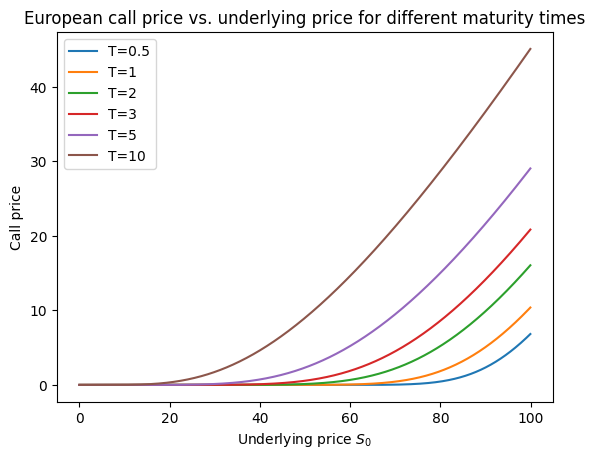

In [5]:
S = np.arange(0.01, 100, 0.1)
for Ti in [0.5, 1, 2, 3, 5, 10]:
    price = [call_price_black_scholes(K, Ti, s, r, sigma) for s in S]
    plt.plot(S, price, label=f"T={Ti}")
plt.xlabel("Underlying price $S_0$")
plt.ylabel("Call price")
plt.title("European call price vs. underlying price for different maturity times")
plt.legend()
plt.show()

On peut remarquer que plus l'horizon du call est grand, plus son prix est élevé tout autres paramètre étant égaux, et ce même si l'option est *out of the money*. De plus, on peut remarquer que asymptotiquement, toutes les courbes semblent avoir la même pente. Ceci s'explique par le fait que le prix d'un call $C$ se situe forcément entre les deux valeurs suivantes:

$$
C \in [\max(S_0 - Ke^{-rT}, 0), S_0]
$$

Ainsi, la pente asymptotique d'un call européen est de $1$.

De plus, le prix du call augmente avec l'augmentation de $S_0$. Ceci est dû au fait qu'un investisseur adoptant une position longue sur un call préférera toujours, toute condition égale par ailleurs, avoir un prix de sous-jacent le plus grand possible, car cela réduit son risque de ne pas pouvoir exercer à maturité.

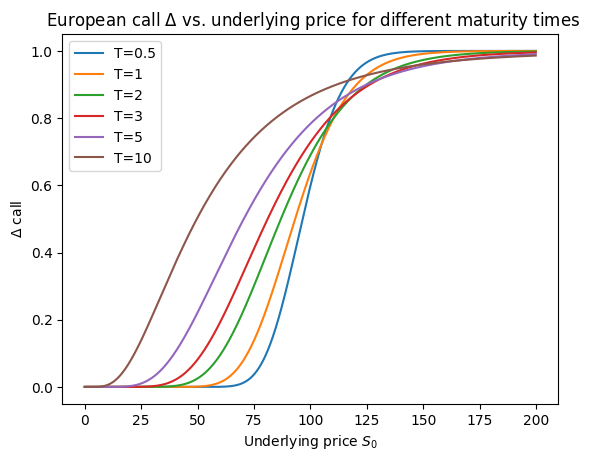

In [6]:
S = np.arange(0.01, 200, 0.1)
for Ti in [0.5, 1, 2, 3, 5, 10]:
    price = [delta_call_bs(K, Ti, s, r, sigma) for s in S]
    plt.plot(S, price, label=f"T={Ti}")
plt.xlabel("Underlying price $S_0$")
plt.ylabel("$\Delta$ call")
plt.title(" European call $\Delta$ vs. underlying price for different maturity times")
plt.legend()
plt.show()

On remarque que $\Delta$ tend vers 0 lorsque $S_0\rightarrow 0$ et $\Delta$ tend vers 1 lorsque $S_0\rightarrow +\infty$ et $\Delta$ est croissante selon $S_0$. On a affaire à une fonction de répartition en $d_1$, donc les comportement asymptiques sont prévisibles, notamment car et $d_1\xrightarrow{S_0\rightarrow 0} -\infty$ et $d_1\xrightarrow{S_0\rightarrow +\infty} +\infty$. Plus le temps à maturité est élevé (jusqu'à $T=10$), plus les variations de $\Delta$ sont lentes. (Sur le graphe ci-dessous on retrouve cette idée avec le fait que $\|\Gamma\|_\infty$ est plus faible pour $T$ grand).

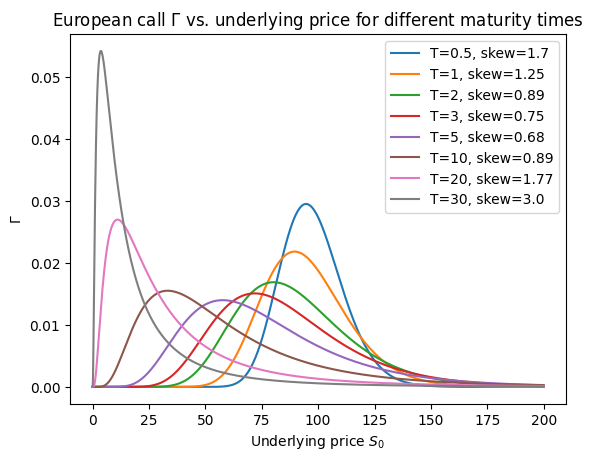

In [7]:
S = np.arange(0.01, 200, 0.1)
for Ti in [0.5, 1, 2, 3, 5, 10, 20, 30]:
    price = [gamma_call_bs(K, Ti, s, r, sigma) for s in S]
    plt.plot(S, price, label=f"T={Ti}, skew={round(skew(price), 2)}")
plt.xlabel("Underlying price $S_0$")
plt.ylabel("$\Gamma$")
plt.title("European call $\Gamma$ vs. underlying price for different maturity times")
plt.legend()
plt.show()

- Les densités sont de plus en plus asymétriques vers la droite lorsque $T$ est grand.
- Les densités s'étalent dans l'espace pour $T<10$ puis se relocalisent vers 0 pour $T>20$.
- Les modes des densités tendent vers 0, plus $T$ tend vers $10$ puis les modes se se réintensifie à mesure que $T$ tend vers $\infty$.

2. Tracer en fonction de N (nombre de simulations) le prix Monte Carlo et l’intervalle de confiance associé (échelle logarithmique sur l'axe des abscisses). Commenter. A partir de
quel N obtient-on une erreur relative du prix Monte Carlo inférieure à 0.1% ?


Nous pouvons estimer le prix Monte-Carlo du call europeen avec l'estimateur suivant:

$$
\forall i \in [\![1, n]\!],  \phi(X_i) = e^{-rT}(S_0 e^{(r - \frac{\sigma^2}{2})T + \sigma X_i \sqrt{T}} - K)_+
$$

où $X_i \hookrightarrow \mathcal{N}(0, 1)$ pour $i \in [\![1, n]\!]$ et $n$ est le nombre d'observations. On peut en déduire le prix Monte-Carlo en prenant la moyenne et obtenir un intervalle de confiance grâce au théorème centrale limite.

On définit les fonctions dont on a besoin:

In [ ]:
def monte_carlo_price(x, K, T, S0, r, sigma):
    """
    Computes the Monte-Carlo price of a European call option given a random sample x.
    Parameters:
        x (float): Sample from the standard normal distribution.
        K (float): Strike price of the option.
        T (float): Time to maturity (in years).
        S0 (float): Current price of the underlying asset.
        r (float): Risk-free interest rate.
        sigma (float): Volatility of the underlying asset.
    Returns:
        float: The Monte-Carlo price of the European call option.
    """
    price_at_T = S0 * np.exp((r - sigma**2 / 2) * T + sigma * x * np.sqrt(T)) - K
    return np.exp(-r * T) * np.maximum(0, price_at_T)


def standard_error(Xs, N):
    """
    Computes the Bessel-corrected standard error.
    Parameters:
        Xs (np.ndarray): Samples on which we compute the ste.
        N (int): Sample size
    Returns:
        float: Standard error.
    """
    return np.sqrt(np.var(Xs, ddof=1) / N)


def monte_carlo_estimator(N, K, T, S0, r, sigma, alpha=0.05):
    """
    Generates N Monte-Carlo price for a European call option.
    Parameters:
        N (int): Sample size.
        K (float): Strike price of the option.
        T (float): Time to maturity (in years).
        S0 (float): Current price of the underlying asset.
        r (float): Risk-free interest rate.
        sigma (float): Volatility of the underlying asset.
        alpha (float): Confidence interval level
    Returns:
        (np.ndarray, np.ndarray): The N Monte-Carlo prices of the European call option and the confidence interval.
    """
    samples = norm.rvs(size=N)
    phis = monte_carlo_price(samples, K, T, S0, r, sigma)
    Cn = np.mean(phis)
    return Cn, Cn + np.array(norm.interval(1 - alpha)) * standard_error(phis, N)

On trace ensuite la variation du prix Monte Carlo de l'option en fonction du nombre d'observation, et son intervalle de confiance associé

A N=7934096.665797492, l'erreur relative est de <0.1%


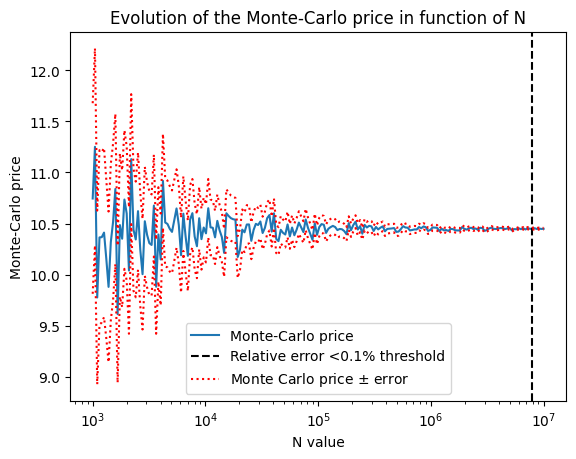

In [9]:
Cns, Cns_up, Cns_down = [], [], []
N_range = np.logspace(3, 7, 200)
for Ni in N_range:
    Cn, error_Cn = monte_carlo_estimator(int(Ni), K, T, S0, r, sigma)
    Cns.append(Cn)
    Cns_up.append(error_Cn[1])
    Cns_down.append(error_Cn[0])
error = (np.array(Cns_up) - np.array(Cns_down)) / (2 * np.array(Cns))
min_thresh = np.argmax(error < 1e-3)

plt.plot(N_range, Cns, label="Monte-Carlo price")
plt.axvline(
    N_range[min_thresh],
    linestyle="--",
    color="black",
    label="Relative error <0.1% threshold",
)
print(f"A N={N_range[min_thresh]}, l'erreur relative est de <0.1%")
plt.plot(
    N_range, Cns_up, linestyle=":", color="red", label="Monte Carlo price $\pm$ error"
)
plt.plot(N_range, Cns_down, linestyle=":", color="red")
plt.xscale("log")
plt.xlabel("N value")
plt.ylabel("Monte-Carlo price")
plt.title("Evolution of the Monte-Carlo price in function of N")
plt.legend()
plt.show()

Le prix oscille beaucoup avec une erreur grande pour des valeurs de $N$ petites (environ $\pm 1$ d'erreur absolue pour $N=10^3$). Néanmoins, au-delà de $N=10^6$ la courbe semble se stabiliser. Il faut tout de même $N\geq5\times 10^6$ pour se retrouver sous la barre de 0.1% d'erreur relative.

3. Pour un $N$ fixé, simuler 100 prix de Monte Carlo et calculer l’écart-type $\hat\sigma_N$ de ces prix.
Faites varier $N$ et tracer $\hat\sigma_N$ en fonction de $N$ en échelle logarithmique. Commenter

In [11]:
N_range = np.logspace(3, 7, 10)
stds = [
    np.std(
        np.array(
            [monte_carlo_estimator(int(Ni), K, T, S0, r, sigma)[0] for _ in range(50)]
        )
    )
    for Ni in N_range
] # On calcule l'écart-type de 50 estimations pour chaque N


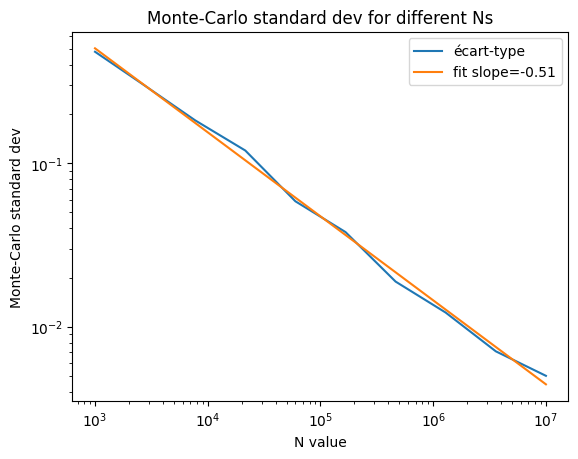

In [12]:
plt.plot(N_range, stds, label="écart-type")
coeffs = np.polyfit(np.log(N_range), np.log(stds), 1)
plt.plot(N_range, np.exp(coeffs[1]) * N_range ** coeffs[0], label=f"fit slope={coeffs[0]:.2f}")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N value")
plt.ylabel("Monte-Carlo standard dev")
plt.title("Monte-Carlo standard dev for different Ns")
plt.legend()
plt.show()

L'écart type diminue assez faiblement en fonction de $N$. Il faut $N> 10^5$ pour que l'écart type soit inférieur à 0.05. Il est de moins en moins avantageux d'ajouter des observations pour diminuer cet écart type.

4. Pour un N fixé, simuler 1 000 prix de Monte Carlo. Tracer leur densité empirique et répéter pour différentes valeurs de N. Commenter

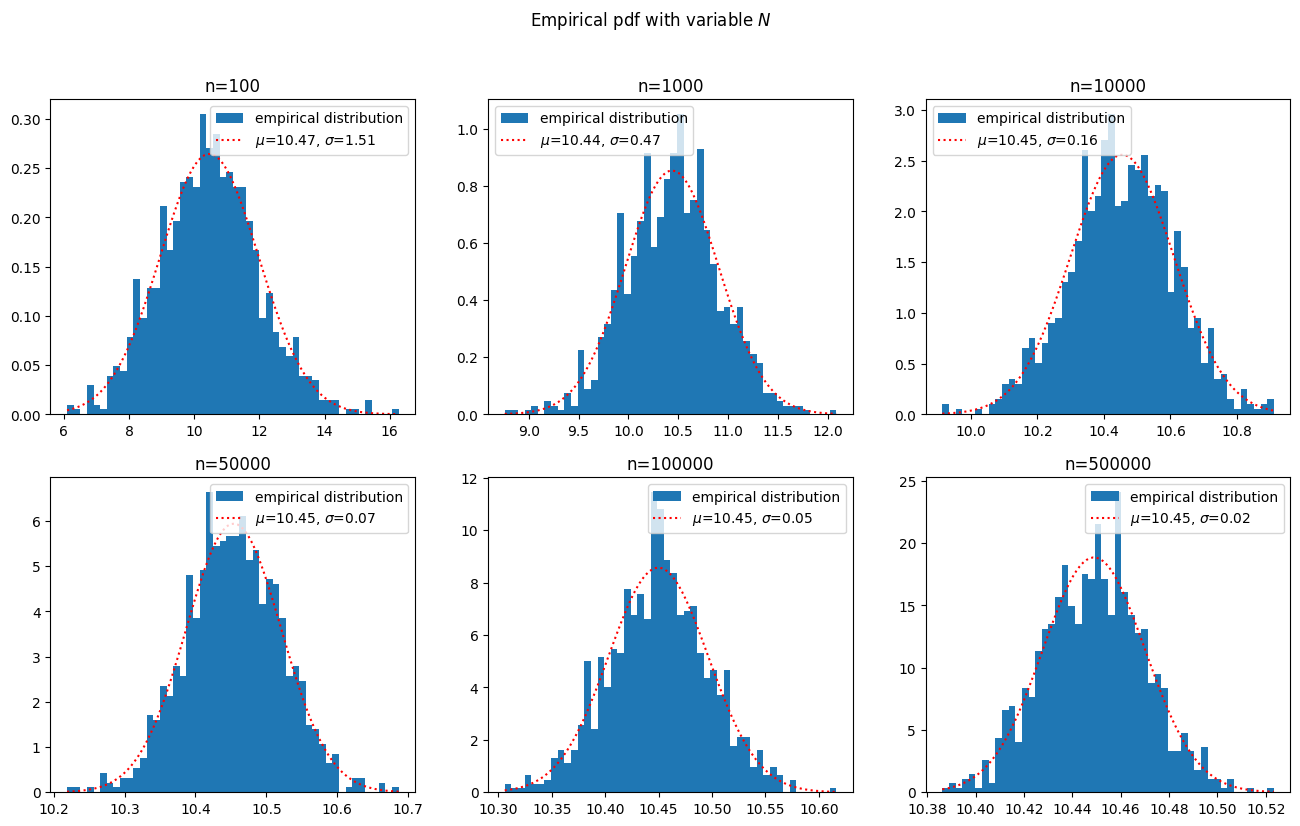

In [ ]:
_, axs = plt.subplots(2, 3, figsize=(16, 9))
N_values = [100, 1000, 10000, 50000, 100000, 500000]
for i, Ni in enumerate(N_values):
    mc_prices = [
        monte_carlo_estimator(int(Ni), K, T, S0, r, sigma)[0] for _ in range(1000)
    ] # On génère Ni prix de Monte-Carlo
    mu_f, sigma_f = norm.fit(mc_prices) # On fit une loi normale sur les prix de Monte-Carlo
    axs[i // 3, i % 3].hist(
        mc_prices, bins=50, density=True, label="empirical distribution"
    ) # Empirical pdf
    axs[i // 3, i % 3].plot(
        np.linspace(min(mc_prices), max(mc_prices), 100),
        norm.pdf(
            np.linspace(min(mc_prices), max(mc_prices), 100), loc=mu_f, scale=sigma_f
        ),
        label=f"$\mu$={round(mu_f, 2)}, $\sigma$={round(sigma_f, 2)}",
        linestyle=":",
        color="red",
    ) # Theory pdf
    axs[i // 3, i % 3].set_title(f"n={Ni}")
    axs[i // 3, i % 3].legend()
plt.suptitle("Empirical pdf with variable $N$")
plt.show()

Le support de la distribution est de largeur toujours plus faible à mesure que $N\rightarrow \infty$, ceci est attendu car l'estimateur converge vers la valeur moyenne d'après la loi des grands nombres. De plus, la distribution des prix apparait comme normale. Ceci est attendu en conséquence du théorème central limite.

5. En utilisant $\texttt{\%\%timeit}$ en début de cellule, mesurer le temps de calcul moyen d’un prix Monte Carlo à $N = 10^6$ simulations avec votre code.


In [84]:
%timeit monte_carlo_estimator(10**6, K, T, S0, r, sigma)

92.3 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


La rapidité de la méthode n'est pas son point fort.